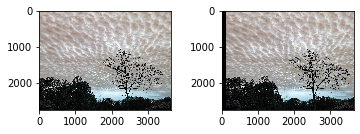

In [8]:
# 图像的平移

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./picture.jpg')
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
mode = imgInfo[2]

dst = np.zeros(imgInfo, np.uint8)

for i in range( height ):
    for j in range( width - 100 ):
        dst[i, j + 100] = img[i, j]

# cv2.imshow('image', dst)
# cv2.waitKey(0)
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(dst)

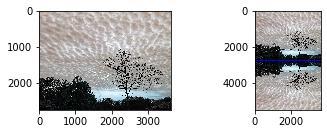

In [10]:
#镜像
deep = imgInfo[2]
dst = np.zeros([height*2, width, deep], np.uint8)

for i in range( height ):
    for j in range( width ):
        dst[i,j] = img[i,j]
        dst[height*2-i-1,j] = img[i,j]

for i in range(width):
    dst[height, i] = (0, 0, 255)
    
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(dst)

(1368, 1824, 3)


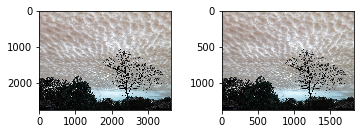

In [11]:
#缩放
# 1 放大 缩小 2 等比例 非等比例
dstHeight = int(height * 0.5)
dstWeight = int(width * 0.5)

# 最近邻域插值 双线性插值 像素关系重采样 立方插值
dst = cv2.resize(img, (dstWeight,dstHeight))
print(dst.shape)
# cv2.imshow('image', dst)
# cv2.waitKey(0)
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(dst)

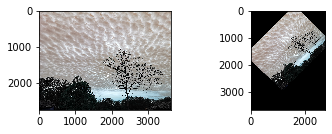

In [12]:
# 旋转
# 定义一个旋转矩阵
matRotate = cv2.getRotationMatrix2D((height*0.5, width*0.5), 45, 0.7) # mat rotate 1 center 2 angle 3 缩放系数

dst = cv2.warpAffine(img, matRotate, (height, width))

plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(dst)

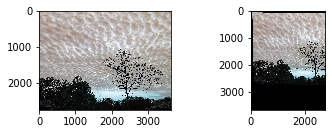

In [13]:
# 仿射
matSrc = np.float32([[0,0],[0,height-1],[width-1, 0]]) # 需要注意的是 行列 和 坐标 是不一致的
matDst = np.float32([[50,50],[100, height-50],[width-200,100]])

matAffine = cv2.getAffineTransform(matSrc,matDst) #mat 1 src 2 dst 形成组合矩阵
dst = cv2.warpAffine(img, matAffine,(height, width))

plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(dst)